# 1-简单人脸识别：OpenCV的LBPH(局部二值模式直方图)

In [1]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
import os
import numpy as np
import cv2 as cv
import sklearn.preprocessing as sp
fd = cv.CascadeClassifier('./data/ml_data/haar/face.xml')


def search_faces(directory):
    directory = os.path.normpath(directory)

    faces = {}
    for curdir, subdirs, files in os.walk(directory):
        for jpeg in (file for file in files
                     if file.endswith('.jpg')):
            path = os.path.join(curdir, jpeg)
            label = path.split(os.path.sep)[-2]
            if label not in faces:
                faces[label] = []
            faces[label].append(path)
    return faces


train_faces = search_faces(
    './data/ml_data/faces/training')
codec = sp.LabelEncoder()
codec.fit(list(train_faces.keys()))
train_x, train_y = [], []
for label, filenames in train_faces.items():
    for filename in filenames:
        image = cv.imread(filename)
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        faces = fd.detectMultiScale(gray, 1.1, 2,
                                    minSize=(100, 100))
        for l, t, w, h in faces:
            train_x.append(
                gray[t:t + h, l:l + w])
            train_y.append(
                codec.transform([label])[0])
train_y = np.array(train_y)
# 局部二值模式直方图人脸识别分类器
model = cv.face.LBPHFaceRecognizer_create()
model.train(train_x, train_y)
test_faces = search_faces(
    './data/ml_data/faces/testing')
test_x, test_y, test_z = [], [], []
for label, filenames in test_faces.items():
    for filename in filenames:
        image = cv.imread(filename)
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        faces = fd.detectMultiScale(gray, 1.1, 2,
                                    minSize=(100, 100))
        for l, t, w, h in faces:
            test_x.append(
                gray[t:t + h, l:l + w])
            test_y.append(
                codec.transform([label])[0])
            a, b = int(w / 2), int(h / 2)
            cv.ellipse(image, (l + a, t + b),
                       (a, b), 0, 0, 360,
                       (255, 0, 255), 2)
            test_z.append(image)
test_y = np.array(test_y)
pred_test_y = []
for face in test_x:
    pred_code = model.predict(face)[0]
    pred_test_y.append(pred_code)
escape = False
while not escape:
    for code, pred_code, image in zip(
            test_y, pred_test_y, test_z):
        label, pred_label = \
            codec.inverse_transform([code, pred_code])
        text = '{} {} {}'.format(
            label,
            '==' if code == pred_code else '!=',
            pred_label)
        cv.putText(image, text, (10, 60),
                   cv.FONT_HERSHEY_SIMPLEX, 2,
                   (255, 255, 255), 6)
        cv.imshow('Recognizing...', image)
        if cv.waitKey(1000) == 27:
            escape = True
            break

KeyboardInterrupt: 

# 2-设计神经网络结构，按照已定结构训练神经网络实现分类业务

Error:0.522880708221031
Error:0.47762026930812307
Error:0.41024074659068527
Error:0.3533809320278515
Error:0.30784092340648783
Error:0.2707065643431156
Error:0.2409156774032954
Error:0.21704297855673355
Error:0.19774397690377474
Error:0.181938648904271
Error:0.16881138875247736
Error:0.15775847209946597
Error:0.14833349992730283
Error:0.14020386854565792
Error:0.13311889151449868
Error:0.1268871578371191
Error:0.1213605727415838
Error:0.11642307393129012
Error:0.11198258704058181
Error:0.10796522827779946
Error:0.10431107688834657
Error:0.10097105495411912
Error:0.09790459694705855
Error:0.09507788904351301
Error:0.09246252423940028
Error:0.09003446433935391
Error:0.08777323089778165
Error:0.0856612687570204
Error:0.08368344098983363
Error:0.08182662482590222
Error:0.08007938587540353
Error:0.07843171357078593
Error:0.07687480485426931
Error:0.07540088617366683
Error:0.07400306611244559
Error:0.07267521268220971
Error:0.07141185059652179
Error:0.07020807483129445
Error:0.06905947753625

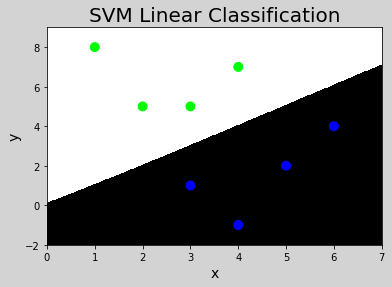

In [6]:
import numpy as np
import matplotlib.pyplot as mp
# sigmiod 函数
def active(x):
    return 1 / (1 + np.exp(-x))

# sigmoid函数导函数
def backward(x):
    return x * (1 - x)

# 单层网路前向传播
def forward(x, w):
    return np.dot(x, w)

x = np.array([
    [3, 1],
    [2, 5],
    [1, 8],
    [6, 4],
    [5, 2],
    [3, 5],
    [4, 7],
    [4, -1]])
y = np.array([0, 1, 1, 0, 0, 1, 1, 0]).reshape(-1,1)

# 随机初始化权重[-1 1)
w0 = 2 * np.random.random((2, 4)) - 1
w1 = 2 * np.random.random((4, 1)) - 1
lrate = 0.01

for j in range(10000):
    l0 = x
    l1 = active(forward(l0, w0))
    l2 = active(forward(l1, w1))
    # 损失
    l2_error = y - l2
    if (j % 100) == 0:
        print ("Error:" + str(np.mean(np.abs(l2_error))))
       #反向传播
    l2_delta = l2_error * backward(l2)
    w1 += l1.T.dot(l2_delta * lrate)
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * backward(l1)
    w0 += l0.T.dot(l1_delta * lrate)

def predict(x):
    l0 = x
    l1 = active(forward(l0, w0))
    l2 = active(forward(l1, w1))
    result = np.zeros_like(l2)
    result[l2>0.5] = 1
    return result

n = 500
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
grid_x = np.meshgrid(np.linspace(l, r, n),
                     np.linspace(b, t, n))
flat_x = np.column_stack((grid_x[0].ravel(), grid_x[1].ravel()))   

flat_y = predict(flat_x)
grid_y = flat_y.reshape(grid_x[0].shape)
mp.figure('SVM Linear Classification', facecolor='lightgray')
mp.title('SVM Linear Classification', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x[0], grid_x[1], grid_y, cmap='gray')
mp.scatter(x[:, 0], x[:, 1], c=y.ravel(), cmap='brg', s=80)
mp.show()

# 3-封装模型

Error:0.5077316545493233
Error:0.11341855704834784
Error:0.07007646623370217
Error:0.05453116178757146
Error:0.045896414590427356
Error:0.040258688076294916
Error:0.036226258301373215
Error:0.03316662105239702
Error:0.03074696221750891
Error:0.028773856952464653
Error:0.02712645838239136
Error:0.02572498438865669
Error:0.024514422390545926
Error:0.023455480133486986
Error:0.02251926498503323
Error:0.021684005466575326
Error:0.02093295050019451
Error:0.020252977821329184
Error:0.019633645441084955
Error:0.01906652884120024
Error:0.01854474762309243
Error:0.018062620875282355
Error:0.017615411906989936
Error:0.017199136237301165
Error:0.01681041514269774
Error:0.016446362536122992
Error:0.01610449658237477
Error:0.01578266991145321
Error:0.015479013982394138
Error:0.015191894332323805
Error:0.014919874284044881
Error:0.014661685288269204
Error:0.01441620251530714
Error:0.014182424633952811
Error:0.013959456955564746
Error:0.013746497301867793
Error:0.013542824091917318
Error:0.0133477862

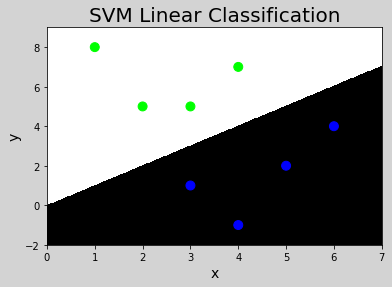

In [9]:
import numpy as np
import matplotlib.pyplot as mp

class ANNModel():
    def __init__(self):
        # 随机初始化权重[-1 1)
        self.w0 = 2 * np.random.random((2, 4)) - 1
        self.w1 = 2 * np.random.random((4, 1)) - 1
        self.lrate = 0.1

    # sigmiod 函数
    def active(self, x):
        return 1 / (1 + np.exp(-x))

    # sigmoid函数导函数
    def backward(self, x):
        return x * (1 - x)

    # 单层网路前向传播
    def forward(self, x, w):
        return np.dot(x, w)

    def fit(self, x,y):
        for j in range(10000):
            l0 = x
            l1 = self.active(self.forward(l0, self.w0))
            l2 = self.active(self.forward(l1, self.w1))
            # 损失
            l2_error = y - l2
            if (j % 100) == 0:
                print ("Error:" + str(np.mean(np.abs(l2_error))))
            l2_delta = l2_error * self.backward(l2)
            self.w1 += l1.T.dot(l2_delta * self.lrate)
            l1_error = l2_delta.dot(self.w1.T)
            l1_delta = l1_error * self.backward(l1)
            self.w0 += l0.T.dot(l1_delta * self.lrate)
    #预测
    def predict(self, x):
        l0 = x
        l1 = self.active(self.forward(l0, self.w0))
        l2 = self.active(self.forward(l1, self.w1))
        result = np.zeros_like(l2)
        result[l2>0.5] = 1
        return result

x = np.array([
    [3, 1],
    [2, 5],
    [1, 8],
    [6, 4],
    [5, 2],
    [3, 5],
    [4, 7],
    [4, -1]])
y = np.array([0, 1, 1, 0, 0, 1, 1, 0]).reshape(-1,1)

n = 500
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
grid_x = np.meshgrid(np.linspace(l, r, n),
                     np.linspace(b, t, n))
flat_x = np.column_stack((grid_x[0].ravel(), grid_x[1].ravel()))   
model = ANNModel()
model.fit(x,y)
flat_y = model.predict(flat_x)
grid_y = flat_y.reshape(grid_x[0].shape)
mp.figure('SVM Linear Classification', facecolor='lightgray')
mp.title('SVM Linear Classification', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x[0], grid_x[1], grid_y, cmap='gray')
mp.scatter(x[:, 0], x[:, 1], c=y.ravel(), cmap='brg', s=80)
mp.show()

# 4-tf- TensorFlow计算

In [ ]:
import tensorflow as tf
# tf.constant 是一个计算，这个计算的结果为一个张量， 保存在变量a 中。
a = tf.constant([1.0,2.0],name ='a')
b = tf.constant([2.0,3.0], name ='b')
print(a,type(a))
result = tf.add(a,b, name='add')
result2=result+a
print(result)

#使用Session执行计算图
session=tf.Session()
r=session.run(result)
print(r)
session.close()

#第二种使用格式
#创建一个会话，并通过Python 中的上下文管理器来管理这个会话。
with tf.Session() as sess:
#使用创建好的会话来计算关心的结果。
  print(sess.run(result))
#不需要再调用" Session.close()"函数来关闭会话，
#当上下文退出时会话关闭和资源释放也自动完成了。

# 5- 变量（ tf. Variable ）

In [ ]:
import tensorflow as tf
# Create two variables.
weights = tf.Variable(tf.random_normal([784, 200], stddev=0.35),name="weights")
biases = tf.Variable(tf.zeros([200,1]), name="biases")
result=tf.mul(weight * bias)
print(weights)
print(biases)

#运行result
with tf.Session() as sess:
    #初始化所有Variable，然后做后续
    sess.run(result)
    print(sess.run(result))